In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv("E://meteorite-landings.csv") #reading csv, named it as df

In [3]:
print(df) #printing df

                      name     id nametype              recclass       mass  \
0                   Aachen      1    Valid                    L5       21.0   
1                   Aarhus      2    Valid                    H6      720.0   
2                     Abee      6    Valid                   EH4   107000.0   
3                 Acapulco     10    Valid           Acapulcoite     1914.0   
4                  Achiras    370    Valid                    L6      780.0   
5                 Adhi Kot    379    Valid                   EH4     4239.0   
6      Adzhi-Bogdo (stone)    390    Valid                 LL3-6      910.0   
7                     Agen    392    Valid                    H5    30000.0   
8                   Aguada    398    Valid                    L6     1620.0   
9            Aguila Blanca    417    Valid                     L     1440.0   
10        Aioun el Atrouss    423    Valid          Diogenite-pm     1000.0   
11                     Aïr    424    Valid          

In [4]:
df.head()  #CLEANING DATA   displaying the top 5 values of df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [5]:
df.tail()  #CLEANING DATA   displaying the last values of df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.983330, -115.683330)"


In [6]:
df.describe()  #CLEANING DATA   describing the statistics of df; understanding df

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [7]:
(df['mass'] == 0).sum()  #CLEANING DATA   min mass is 0, mass can't be deleted. Need to delete it

19

In [8]:
df['mass'].loc[df['mass'] == 0]  #CLEANING DATA   identifying the ids with mass=0

12627    0.0
25551    0.0
31060    0.0
31061    0.0
31062    0.0
31063    0.0
31064    0.0
31065    0.0
31066    0.0
31067    0.0
31068    0.0
31069    0.0
31070    0.0
31071    0.0
31072    0.0
31073    0.0
31074    0.0
31075    0.0
31076    0.0
Name: mass, dtype: float64

In [9]:
df.drop(df[df.mass == 0].index, inplace=True)  #CLEANING DATA   dropping mass=0 values

In [10]:
(df['mass'] == 0).sum() #CLEANING DATA   checking for values of mass=0

0

In [11]:
df.describe()  #CLEANING DATA   rechecking data

,id,mass,year,reclat,reclong
count,45697.000000,4.556600e+04,45409.000000,38382.000000,38382.000000
mean,26877.643675,1.328362e+04,1991.766148,-39.167575,61.095037
std,16853.748048,5.751087e+05,27.184959,46.343738,80.659494
min,1.000000,1.000000e-02,301.000000,-87.366670,-165.433330
25%,12684.000000,7.200000e+00,1987.000000,-76.714685,0.000000
50%,24252.000000,3.269500e+01,1998.000000,-71.500000,35.666670
75%,40638.000000,2.028000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [12]:
df.isnull().sum()  #CLEANING DATA   checking for null values

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [13]:
df['year'].fillna('not available')  #CLEANING DATA   replacing the null values 

0                 1880
1                 1951
2                 1952
3                 1976
4                 1902
5                 1919
6                 1949
7                 1814
8                 1930
9                 1920
10                1974
11                1925
12                1769
13                1949
14                1838
15                1959
16                1981
17                1957
18                2001
19                1806
20                1766
21                1949
22                2002
23                1835
24                1873
25                1860
26                1900
27                1883
28                1899
29                1969
             ...      
45686             1914
45687             2011
45688             2011
45689             2011
45690             1946
45691             1792
45692             1969
45693             1919
45694             1999
45695             1987
45696             1998
45697             1998
45698      

In [14]:
df=df[df.year>=860]  #CLEANING DATA   year below 860 needs to be cleaned
df=df[df.year<=2016]  #CLEANING DATA   years above 2016 needs to be cleaned

In [15]:
df.describe()  #CLEANING DATA   checking for the correct values, if data has been removed

,id,mass,year,reclat,reclong
count,45405.000000,4.529000e+04,45405.000000,38203.000000,38203.00000
mean,26792.441493,1.332084e+04,1991.820394,-39.431404,61.22408
std,16825.350593,5.768477e+05,25.050915,46.278898,80.76869
min,1.000000,1.000000e-02,860.000000,-87.366670,-165.43333
25%,12638.000000,7.150000e+00,1987.000000,-76.716670,0.00000
50%,24152.000000,3.217450e+01,1998.000000,-71.500000,35.66667
75%,40531.000000,2.001750e+02,2003.000000,0.000000,157.16667
max,57458.000000,6.000000e+07,2013.000000,81.166670,354.47333


In [16]:
df=df[df.reclong!=0]
df=df[df.reclat!=0]
df=df[df.reclong<=180]
df=df[df.reclong>=-180]  #CLEANING DATA   removing unwanted reclong and reclat values

In [17]:
df.describe()  #CLEANING DATA   rechecking

,id,mass,year,reclat,reclong
count,31794.000000,3.168700e+04,31794.000000,31794.000000,31794.000000
mean,20753.117632,1.868419e+04,1986.886645,-47.379883,73.303068
std,14963.928713,6.894655e+05,28.183840,46.870794,83.404654
min,1.000000,1.000000e-02,860.000000,-87.366670,-165.433330
25%,9197.250000,6.550000e+00,1983.000000,-79.683330,26.000000
50%,18506.500000,3.010000e+01,1991.000000,-72.000000,57.091450
75%,27308.750000,2.050000e+02,2000.000000,18.436622,159.401040
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


In [18]:
df['reclat'].fillna('not available')  #CLEANING DATA   replacing NaN values of reclat with 'not available'

0        50.77500
1        56.18333
2        54.21667
3        16.88333
4       -33.16667
5        32.10000
6        44.83333
7        44.21667
8       -31.60000
9       -30.86667
10       16.39806
11       19.08333
12       50.66667
13       29.51667
14       29.71667
15        8.91667
16       39.91667
17       24.41667
18       13.66033
19       44.11667
20       44.65000
21        2.00000
22       45.82133
23       51.78333
24       36.23333
25       44.88333
26       50.95000
27       45.26667
28       42.53333
29       26.96667
           ...   
45684   -32.10000
45685    26.06000
45686    31.65000
45687    34.81970
45688    34.82658
45689    34.81923
45690    60.00000
45691    22.81667
45693    35.00000
45694    27.33333
45695    30.36667
45696    50.76278
45697    25.00944
45698    27.00000
45699    18.33333
45701    29.75000
45702    32.15833
45703    42.51333
45704    20.25000
45705    29.85861
45706    52.13333
45707    24.23333
45708    68.00000
45709    31.20000
45710    2

In [19]:
df['reclong'].fillna('not available') #CLEANING DATA  checking NaN values of reclong, and replacing it with 'not available'

0          6.08333
1         10.23333
2       -113.00000
3        -99.90000
4        -64.95000
5         71.80000
6         95.16667
7          0.61667
8        -65.23333
9        -64.55000
10        -9.57028
11         8.38333
12         2.33333
13        35.05000
14        77.95000
15         8.43333
16        42.81667
17        39.51667
18        28.96000
19         4.08333
20        11.01667
21        22.66667
22         6.01533
23        -1.78333
24        37.13333
25         8.75000
26        31.81667
27        10.15000
28       -85.88333
29      -105.31667
           ...    
45684    117.71667
45685    118.01000
45686   -106.18333
45687   -114.27610
45688   -114.27763
45689   -114.27735
45690    140.00000
45691   -102.56667
45693    -94.75000
45694     -9.33333
45695     -5.85000
45696     22.86611
45697   -100.75000
45698    -99.00000
45699    -97.50000
45701     -4.50000
45702      4.63333
45703    -88.48944
45704    -12.68333
45705     -2.64500
45706     81.96667
45707    111

In [20]:
df.describe()  #CLEANING DATA  rechecking

,id,mass,year,reclat,reclong
count,31794.000000,3.168700e+04,31794.000000,31794.000000,31794.000000
mean,20753.117632,1.868419e+04,1986.886645,-47.379883,73.303068
std,14963.928713,6.894655e+05,28.183840,46.870794,83.404654
min,1.000000,1.000000e-02,860.000000,-87.366670,-165.433330
25%,9197.250000,6.550000e+00,1983.000000,-79.683330,26.000000
50%,18506.500000,3.010000e+01,1991.000000,-72.000000,57.091450
75%,27308.750000,2.050000e+02,2000.000000,18.436622,159.401040
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


In [21]:
df.isnull().sum()  #CLEANING DATA  checking for new null values, only one null value i.e. Mass

name             0
id               0
nametype         0
recclass         0
mass           107
fall             0
year             0
reclat           0
reclong          0
GeoLocation      0
dtype: int64

In [22]:
df['mass'].fillna(df['mass'].mean(), inplace=True)  #CLEANING DATA replacing the mass NaN values with the mean of all mass

In [23]:
df.isnull().sum()  #CLEANING DATA  checking the null values

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

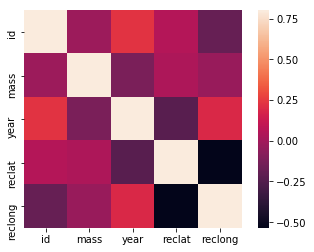

In [24]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)  #CHECKING CORRELATIONS Darker shades indicate less correlation, and lighter ones indicate more correlation 

In [25]:
id = df['id']
Year = df['year']
np.corrcoef(id, Year)  #CHECKING CORRELATION between year and id. It is positive, means that data is correalted

array([[ 1.        ,  0.22878676],
       [ 0.22878676,  1.        ]])

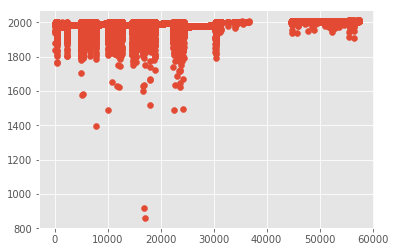

In [26]:
import matplotlib
matplotlib.style.use('ggplot')

plt.scatter(id, Year)
plt.show()   #PLOTTING a scatterplot of the correlation

In [27]:
mass= df['mass']
year = df['year']
np.corrcoef(mass, year)  #CHECKING CORRELATION between year and mass. It is negative, means that data is less correalted

array([[ 1.        , -0.11790163],
       [-0.11790163,  1.        ]])

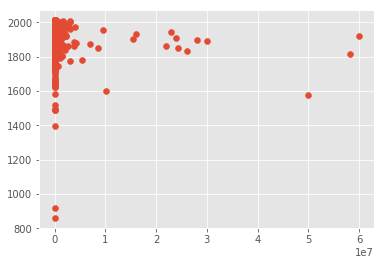

In [28]:
import matplotlib
matplotlib.style.use('ggplot')

plt.scatter(mass, year)
plt.show()  #PLOTTING a scatterplot of the correlation

In [29]:
df_fell = df.groupby('fall').get_group('Fell')
df_found = df.groupby('fall').get_group('Found')   #defining variables df_fell and df_found as groups of the fall column

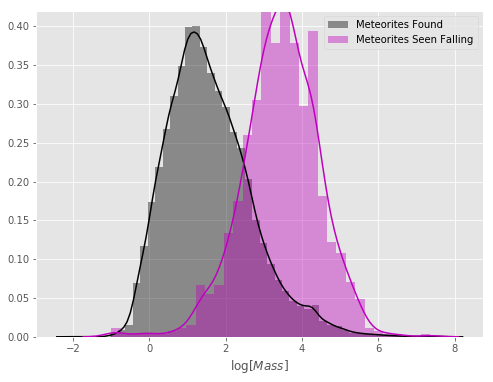

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(np.log10(df_found.mass),color='k')
sns.distplot(np.log10(df_fell.mass),color='m',axlabel='$\log[Mass]$')
plt.legend(['Meteorites Found','Meteorites Seen Falling'])    #PLOTTING distplot for the meteorite fallen and found

(1900, 2014)

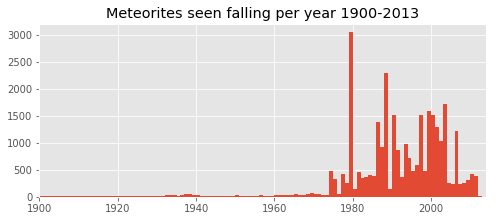

In [31]:
plt.subplot(211)
df.year.hist(bins=np.arange(1900,2014,1),figsize=(8,7))
plt.title('Meteorites seen falling per year 1900-2013')
plt.xlim(1900,2014)   #PLOTTING histogram for the meteorites falling over the pass years

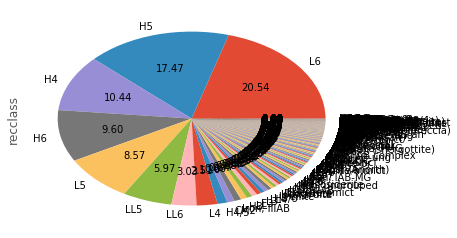

In [32]:
df['recclass'].value_counts().plot.pie(autopct='%.2f')  #PLOTTING pi chart for the types of recclass

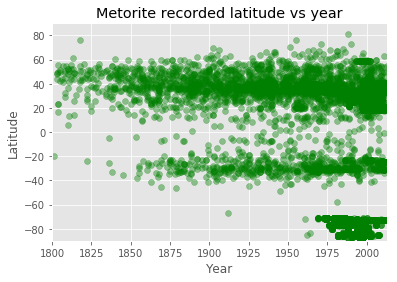

In [33]:
plt.scatter(df.year, df.reclat, color= 'g', alpha= 0.4)
plt.xlim(1800,2013)
plt.ylim(-90,90)
plt.ylabel('Latitude')
plt.xlabel('Year')
plt.title('Metorite recorded latitude vs year')  #PLOTTING a scatterplot for latitude against year. Displaying the latitude where the meteroites have fallen against year

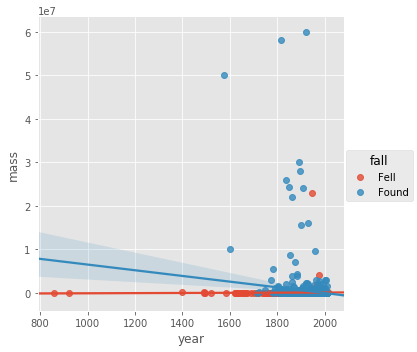

In [34]:
sns.lmplot(x="year", y="mass", hue="fall", data=df)  #PLOTTING lmplot of year and mass, with fall as the hue

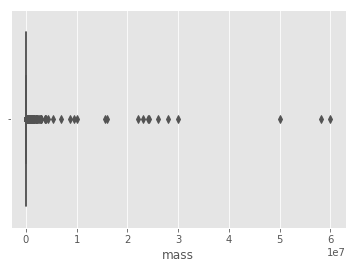

In [35]:
sns.boxplot(x=df['mass'])  #IDENTIFYING OUTLIERS for mass. No outliers possible, as mass cam be of any measure, and the mass=0 was already eliminated

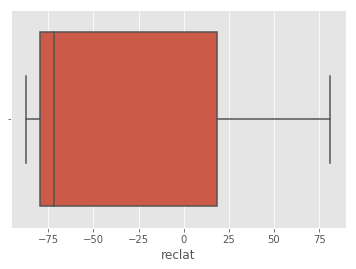

In [36]:
sns.boxplot(x=df['reclat'])  #INDENTIFYING OUTLIERS for reclat. No outliers.

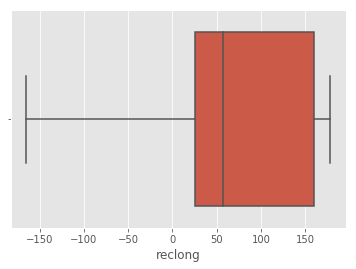

In [37]:
sns.boxplot(x=df['reclong'])  #IDENTIFYING OUTLIERS for reclong. No outliers.

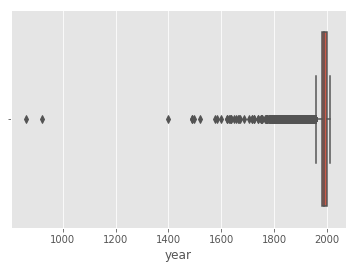

In [38]:
sns.boxplot(x=df['year'])  #IDENTIFYING OUTLIERS for year, no outliers. Majority of the years between 1950-2016. Eliminated the NaN values and erroneous values

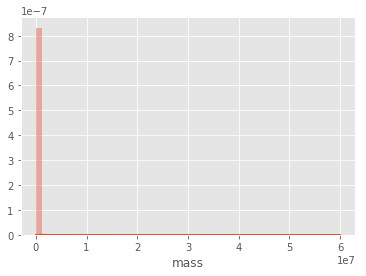

In [39]:
sns.distplot(df['mass'])  #DATA DISTRIBUTION; majority of the data lies between 0 le-7 and 1 le-7

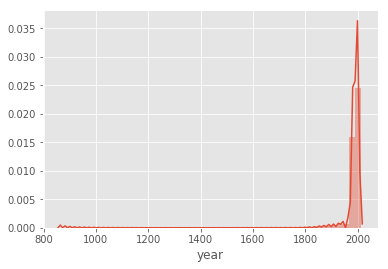

In [40]:
sns.distplot(df['year']) #DATA DISTRIBUTION; majority of the data lies between the years 1950-200

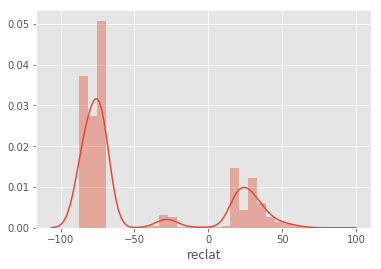

In [41]:
sns.distplot(df['reclat'])  #DATA DISTRIBUTION; majority of data lies between -100 and -50, forming a bell curve. 

In [42]:
print(df.shape)
df.head()

(31794, 10)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [43]:

f1= df['reclat'].values
f2= df['reclong'].values
X = np.array(list(zip(f1, f2)))


In [44]:
from sklearn.cluster import KMeans

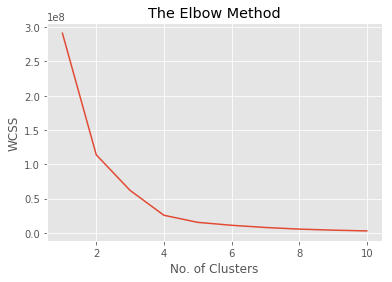

In [45]:
#using elbow method to find the optimal no. of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    #inertia - sum of squares within clusters
plt.plot(range(1,11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

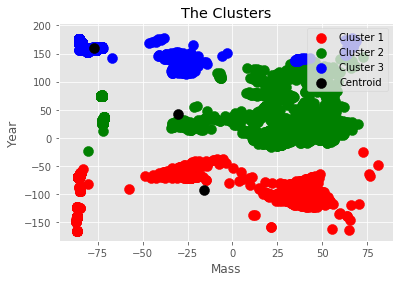

In [46]:
# Applying k-means to the dataset

kmeans = KMeans(n_clusters=3, init = 'k-means++',max_iter=300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#display the clusters

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans ==0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans ==1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans ==2, 1], s = 100, c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100 , c = 'black', label = 'Centroid')
plt.title('The Clusters')
plt.xlabel('Mass')
plt.ylabel('Year')
plt.legend()
plt.show()

In [47]:
#Applying hierarchical clustering (agglomerative - top down)to the dataset

from sklearn.cluster import AgglomerativeClustering



In [48]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#display the clusters

plt.scatter(X[y_hc == 0,0], X[y_hc ==0, 1], s = 150, c = 'blue', label = 'Low Income')
plt.scatter(X[y_hc == 1,0], X[y_hc ==1, 1], s = 50, c = 'green', label = 'Moderate Income')
plt.scatter(X[y_hc == 2,0], X[y_hc ==2, 1], s = 150, c = 'red', label = 'High Income')

plt.title('The Clusters')
plt.xlabel('year')
plt.ylabel('mass')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [55]:
X1 = df[["reclat"]]
y1 = df[["reclong"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X1, y1)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 28.25051252] [[-0.95087941]]


In [54]:
from sklearn import linear_model
import statsmodels.api as sm


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [56]:
X1 = df[["reclat"]]
y1 = df[["reclong"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X1, y1)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 28.25051252] [[-0.95087941]]


In [57]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y1, X1)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                reclong   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 4.128e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:42:08   Log-Likelihood:            -1.8163e+05
No. Observations:               31794   AIC:                         3.633e+05
Df Residuals:                   31793   BIC:                         3.633e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
reclat        -1.2522      0.006   -203.168      0.000      -1.264      -1.240
==============================================================================
Omnibus:                     4663.987   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7218.677
Skew:                          -1.043   Prob(JB):                         0.00
Kurtosis:                       4.046   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

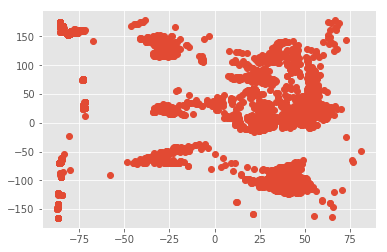

In [58]:

plt.plot(X1, y1, "o")

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X2 = df[["mass","year","reclat","reclong"]]
DataFrame=X2
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
print(vif)

   VIF Factor features
0    1.001922     mass
1    2.202615     year
2    2.839242   reclat
3    2.483303  reclong


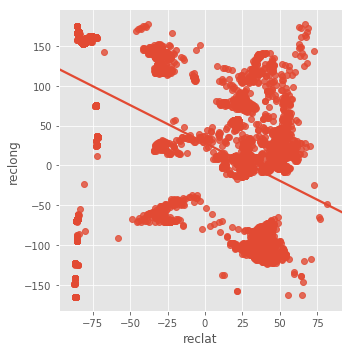

In [60]:
sns.lmplot(x='reclat', y='reclong', data=df, ci=None)

In [61]:
from pylab import rcParams

In [62]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

NameError: name 'sb' is not defined

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


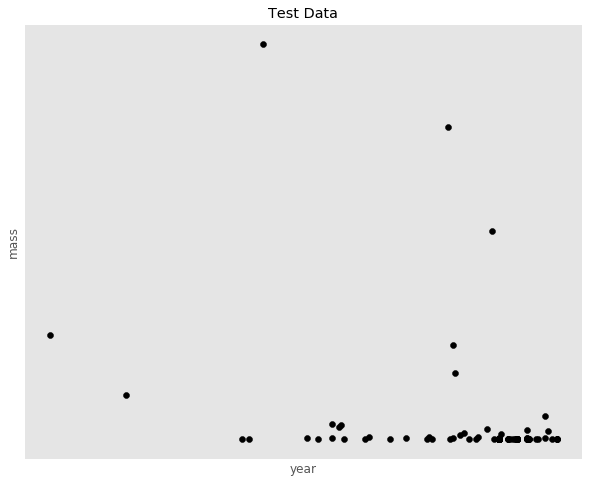

In [63]:
import matplotlib
matplotlib.use('GTKAgg')
 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

 
Y4 = df['mass']
X4 = df['year']
 
X4=X4.reshape(len(X4),1)
Y4=Y4.reshape(len(Y4),1)
 
# Split the data into training/testing sets
X_train = X4[:-250]
X_test = X4[-250:]
 
# Split the targets into training/testing sets
Y_train = Y4[:-250]
Y_test = Y4[-250:]
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('year')
plt.ylabel('mass')
plt.xticks(())
plt.yticks(())
 
plt.show()

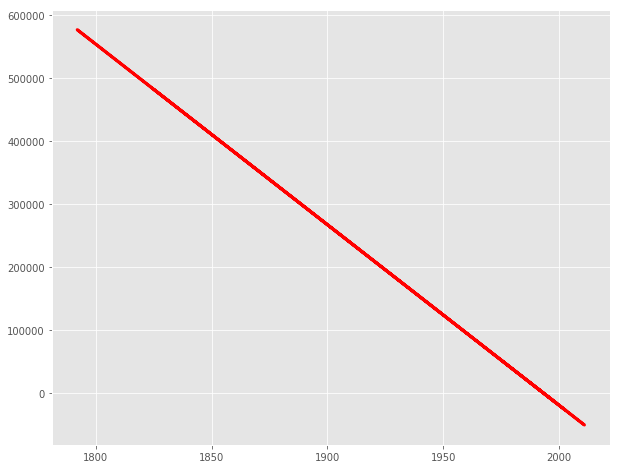

In [64]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

In [65]:
print(str(round(regr.predict(5000))) )

TypeError: type numpy.ndarray doesn't define __round__ method

In [ ]:
df.head()

In [ ]:
status = [1 if values == 'Fell' else 0 for values in df.fall]     


In [ ]:
df.head()

In [ ]:
status.head()

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn import preprocessing
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)



In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

In [ ]:
print(df)

In [ ]:
df.corr()

In [ ]:
df.corr()

In [ ]:
df.head(0)

In [ ]:
df.head()

In [ ]:
df.isnull()

In [49]:
df.isnull()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [52]:
df.isnull().sum()

name               0
id                 0
nametype           0
recclass           0
mass               0
fall           31794
year               0
reclat             0
reclong            0
GeoLocation        0
dtype: int64

In [51]:
df['fall'] = df['fall'].map({'fell': 1, 'found': 0})